# Titanic

## Conteúdo 

**idade**: a idade é fracionária se for menor que 1. Se a idade for estimada, é na forma de xx.5 

Variable|Definition|Key
--|--|--
survival|Survival|0 = No, 1 = Yes
pclass|Status socioeconômico (SES) 1st = Upper 2nd = Middle 3rd = Lower|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sexo|
Age|Idade em anos|
sibsp|# Quantidade de cônjuges e irmãos a bordo | Sibling = irmão, irmã, meio-irmão, meia-irmã. Spouse = marido, esposa (amantes e noivos foram ignorados)
parch|# Quantidade de pais e filhos a bordo | Parent  = mãe, pai. Child = filha, filho, enteada, enteado Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas
ticket|Número do Ticket|
fare|Tarifa de passageiro|
cabin|Número da Cabine|
embarked|Local do Embarque|C = Cherbourg, Q = Queenstown, S = Southampton

## Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o DataFrame 

In [2]:
df = pd.read_csv("../datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Sumário Estatístico

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Estudo das Variáveis

### Pclass

- Nenhuma valor inválido encontrado

In [5]:
df['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Média de sobreviventes por status social

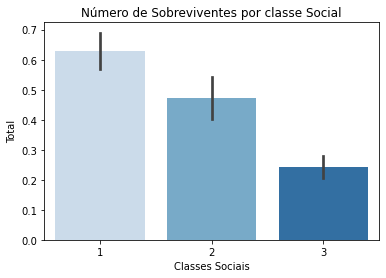

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', palette = 'Blues' ,data = df)

#Altera as etiquetas
plt.xlabel("Classes Sociais")
plt.ylabel("Total")
plt.title("Número de Sobreviventes por classe Social")

plt.show()

### Age

- 177 idade inválidas

In [16]:
df['Age'].isna().sum()

177

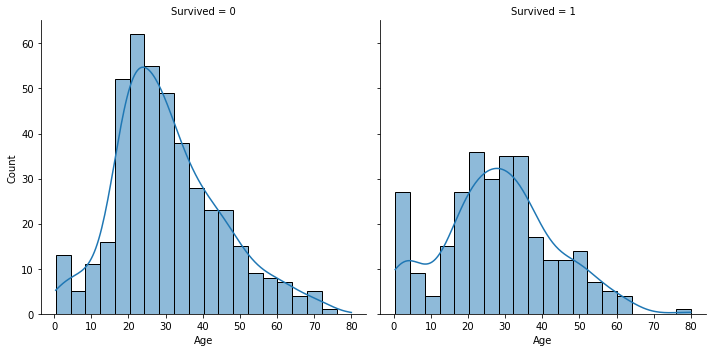

In [18]:
sns.displot(x = 'Age', col = 'Survived', data = df, kde = True)
plt.show()

### Sex

- Nenhum valor inválido encontrado

In [54]:
df['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

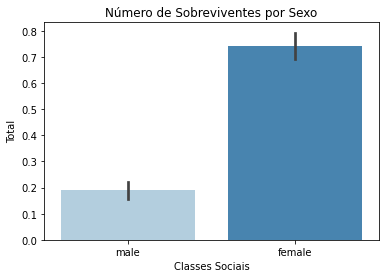

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', palette = 'Blues' ,data = df)

#Altera as etiquetas
plt.xlabel("Classes Sociais")
plt.ylabel("Total")
plt.title("Número de Sobreviventes por Sexo")

plt.show()

## SibSp

- Nenhum valor inválido encontrado

In [55]:
df['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

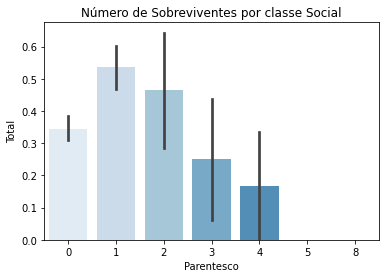

In [9]:
sns.barplot(x = 'SibSp', y = 'Survived', palette = 'Blues' ,data = df)

#Altera as etiquetas
plt.xlabel("Parentesco")
plt.ylabel("Total")
plt.title("Número de Sobreviventes por classe Social")

plt.show()

## Parch

- Nenhum valor inválido encontrado

In [56]:
df['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

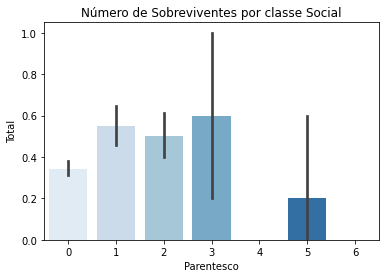

In [8]:
sns.barplot(x = 'Parch', y = 'Survived', palette = 'Blues', data = df)

#Altera as etiquetas
plt.xlabel("Parentesco")
plt.ylabel("Total")
plt.title("Número de Sobreviventes por classe Social")

plt.show()

## Ticket

- Nenhum valor inválido encontrado

In [31]:
df['Ticket'].isna().sum()

0

## Fare

- O valor máximo da tarifa assume 512, onde a média e o 75% percentil é 31-32
- Exitem passageiros que não pagaram tarifas

In [32]:
df['Fare'].isna().sum()

0

In [42]:
df[df['Fare'] >= 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [40]:
df[df['Fare'] <= 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

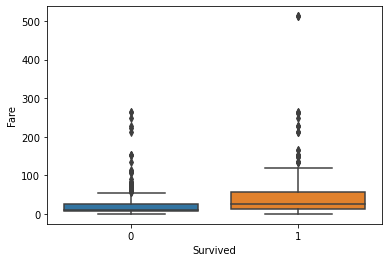

In [5]:
sns.boxplot(x = df.Survived, y = df['Fare'])

## Cabin

- Contém valores nulos
- Passageiros com mais de uma cabine?

In [43]:
df.Cabin.isna().sum()

687

In [57]:
df.Cabin.value_counts(dropna = False)

NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
E36              1
E38              1
C90              1
B42              1
C101             1
Name: Cabin, Length: 148, dtype: int64

## Embarked

- Contém valores nulos

In [46]:
df.Embarked.isna().sum()

2

In [58]:
df.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

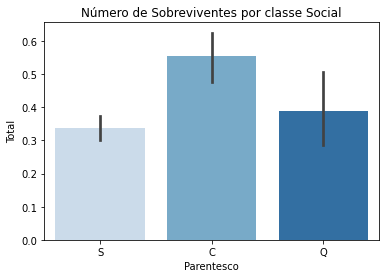

In [7]:
sns.barplot(x = 'Embarked', y = 'Survived', palette = 'Blues', data = df)

#Altera as etiquetas
plt.xlabel("Parentesco")
plt.ylabel("Total")
plt.title("Número de Sobreviventes por classe Social")

plt.show()

## Name

- Não parace ter valores inválidos

In [52]:
df.Name.isna().sum()

0